In [340]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

final_arcs = pd.read_csv('/data/pepper/final_data/arcs_calculated.csv')
form_data = pd.read_csv('form_data.csv')
form_data.columns = ['pnum', 'sex', 'age', 'shoulder_problems', 'side', 'handesness', 'complaints', 'permission', 'asd']
form_data = form_data[:107]
form_data['pnum'] = form_data.pnum.astype('int64')
form_data['sex'] = form_data.sex.map(lambda x: str(x).upper())
form_data['shoulder_problems'] = form_data.shoulder_problems

In [341]:
form_data_left_probs = form_data.loc[form_data['side'] == 'l']
form_data_right_probs = form_data.loc[form_data['side'] == 'r']

In [342]:
final_arcs_1 = final_arcs.loc[final_arcs['eNum'] == 1]
final_arcs_2 = final_arcs.loc[final_arcs['eNum'] == 2]
final_arcs_3 = final_arcs.loc[final_arcs['eNum'] == 3]

final_arcs_1_l = final_arcs_1[final_arcs['pNum'].isin(form_data_left_probs.pnum)]

final_arcs_1_r = final_arcs_1[final_arcs['pNum'].isin(form_data_right_probs.pnum)]

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [343]:
final_arcs_1_l = final_arcs_1_l.groupby(['pNum']).max()
final_arcs_1_l

final_arcs_1_r = final_arcs_1_r.groupby(['pNum']).max()
final_arcs_1_r

final_arcs_injured_singleside = pd.concat([final_arcs_1_l, final_arcs_1_r])
final_arcs_injured_singleside = final_arcs_injured_singleside.dropna(subset=['Side'])
final_arcs_injured_singleside = final_arcs_injured_singleside.drop(['arc_left', 'arc_right', 'eNum', 'frameNum', 'Unnamed: 0'], axis=1)
final_arcs_injured_singleside = final_arcs_injured_singleside.loc[final_arcs_injured_singleside['Side'] != 'lr']
final_arcs_injured_singleside = final_arcs_injured_singleside.drop(['Side'], axis=1)

final_arcs_injured_singleside['pnum'] = final_arcs_injured_singleside.index

In [344]:
healthy_n = form_data[form_data['shoulder_problems'] == 'n']
healthy_N = form_data[form_data['shoulder_problems'] == 'N']
healthy = pd.concat([healthy_n, healthy_N])
healthy = healthy.drop(['sex', 'side', 'handesness', 'complaints', 'permission', 'asd'], axis=1)
healthy['shoulder_problems'] = healthy.shoulder_problems.map(lambda x: str(x).upper())

In [345]:
unhealthy = pd.concat([form_data_left_probs, form_data_right_probs])
unhealthy = unhealthy.drop(['shoulder_problems', 'sex', 'side', 'handesness', 'complaints', 'permission', 'asd'], axis=1)
unhealthy['shoulder_problems'] = 'Y'

In [346]:
h_and_u = pd.concat([healthy, unhealthy])
h_and_u

,pnum,age,shoulder_problems
9,10,47,N
25,26,23,N
26,27,59,N
27,28,19,N
28,29,19,N
29,30,22,N
30,31,20,N
31,32,59,N
32,33,23,N
34,35,24,N


In [347]:
final_arcs_1 = final_arcs.loc[final_arcs['eNum'] == 1].groupby('pNum').max()
final_arcs_1 = final_arcs_1.drop(['arc_left', 'arc_right', 'eNum', 'frameNum', 'Side', 'Unnamed: 0'], axis=1)
final_arcs_1['pnum'] = final_arcs_1.index
final_arcs_1

,arc,pnum
pNum,,
1,177.022722,1
3,175.535749,3
4,169.251089,4
5,161.563331,5
6,197.110482,6
7,187.558733,7
8,167.056151,8
9,180.796165,9
10,183.690021,10


In [348]:
to_cluster = h_and_u.join(final_arcs_1.set_index('pnum'), on='pnum')
to_cluster

,pnum,age,shoulder_problems,arc
9,10,47,N,183.690021
25,26,23,N,150.608206
26,27,59,N,168.880488
27,28,19,N,186.686203
28,29,19,N,190.215895
29,30,22,N,182.466351
30,31,20,N,184.630348
31,32,59,N,198.836691
32,33,23,N,179.491620
34,35,24,N,188.878585


In [352]:
from sklearn.cluster import KMeans
to_model = to_cluster[['age', 'arc']]
to_model = to_model.dropna()
model = KMeans(n_clusters = 2)
model.fit(to_model)
to_cluster = to_cluster.dropna()

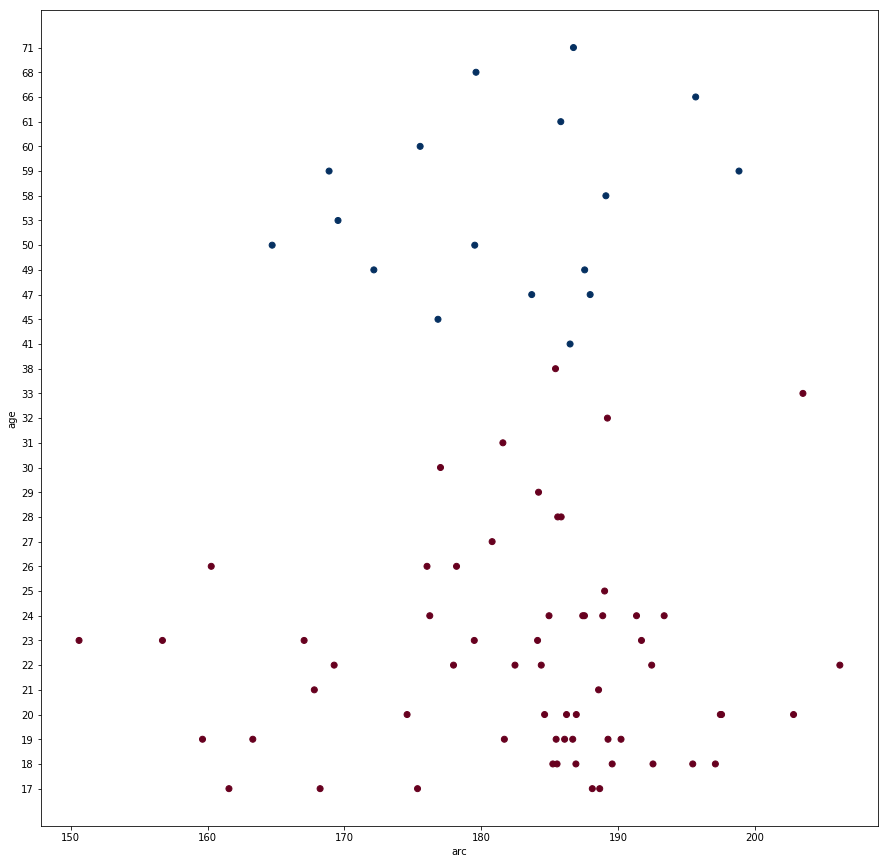

In [355]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
xs = to_model['arc']
ys = to_model['age']
plt.xlabel('arc')
plt.ylabel('age')
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
labels = model.predict(to_model)
plt.scatter(xs, ys, alpha=1, c=labels, cmap=plt.cm.RdBu)
plt.show()
xds = []
yds = []
labels_d = []

xcs = []
ycs = []
labels_c = []
for i in range(0, len(xs)):
    if list(to_cluster.shoulder_problems)[i] == 'Y':
        xds.append(list(xs)[i])
        yds.append(list(ys)[i])
        labels_d.append(list(labels)[i])
    else:
        xcs.append(list(xs)[i])
        ycs.append(list(ys)[i])
        labels_c.append(list(labels)[i])
    
    

In [356]:
#plt.scatter(xds, yds, marker='D', alpha=1, c=labels_d, cmap=plt.cm.RdBu)
#plt.scatter(xcs, ycs, marker='X', alpha=1, c=labels_c, cmap=plt.cm.RdBu)
#plt.show()

# Analysis

After viewing this result, there is a conclusing that, because our age distribution in our sample data is not uniform enough, it will mostly cluster on age. 

To remedy this, we would need to have more recordings of a wider population.